Mounted at /content/drive


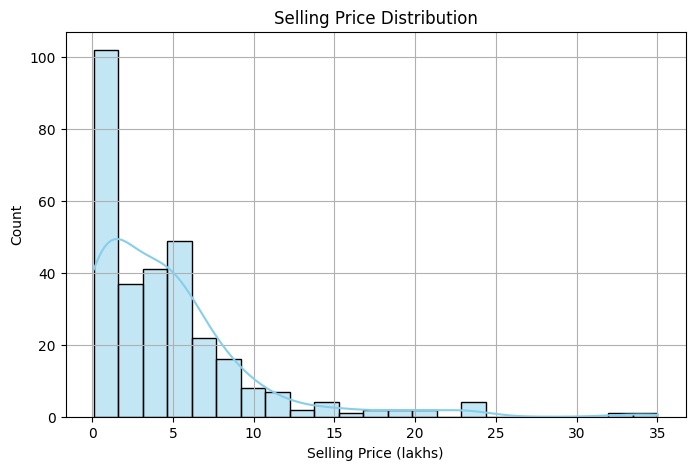

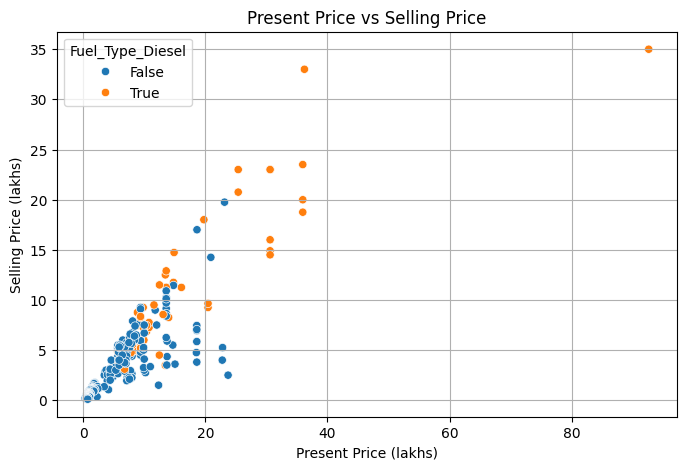

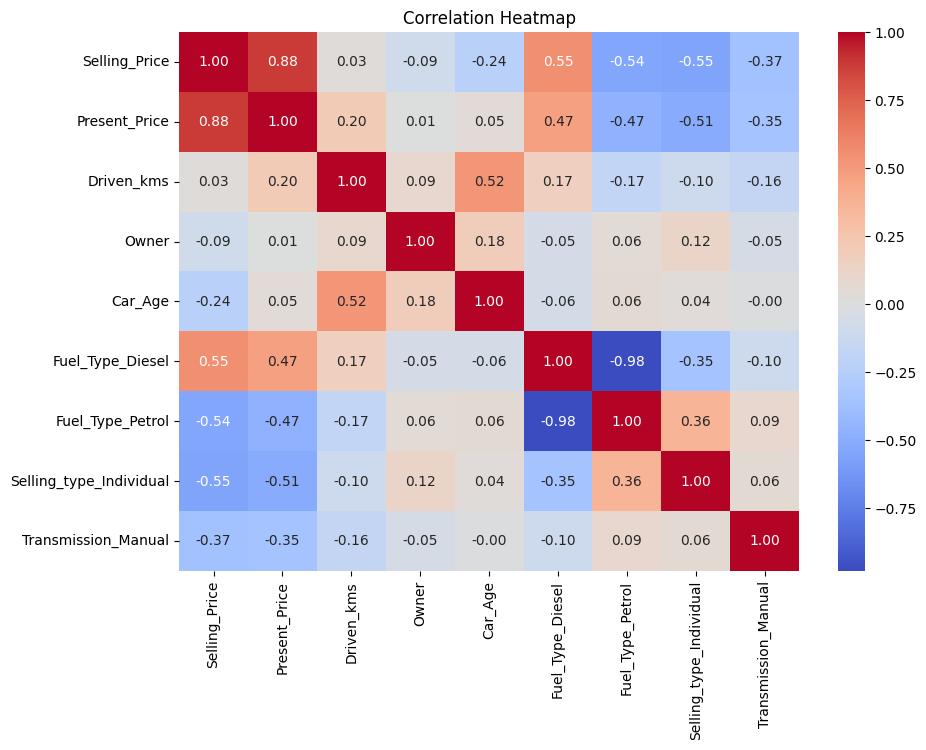

R2 Score: 0.9560


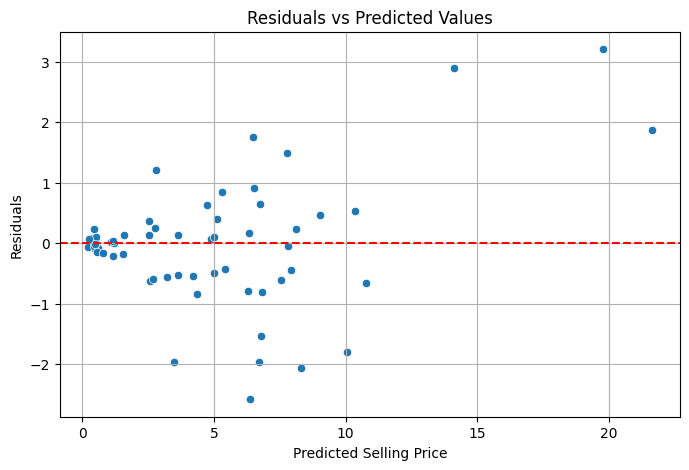


🔍 Predict your Car's Selling Price
Enter the current ex-showroom price (in lakhs): 12
Enter total kilometers driven: 1300
Enter number of previous owners (0/1/3): 1
Enter car age in years: 5
Enter fuel type (Petrol/Diesel/CNG): Petrol
Enter seller type (Dealer/Individual): Individual
Enter transmission type (Manual/Automatic): Automatic

💰 Estimated Selling Price: ₹ 9.45 lakhs


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [2]:
# Car Price Prediction with Visualizations and User Input
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

from google.colab import drive
drive.mount('/content/drive')

path='/content/drive/MyDrive/csv/car data.csv'
df = pd.read_csv(path)

# Step 1: Feature Engineering
df['Car_Age'] = 2025 - df['Year']
df.drop(['Year'], axis=1, inplace=True)
df.drop(['Car_Name'], axis=1, inplace=True)

# Step 2: Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Step 3: Visualizations 📊

# 1. Selling Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Selling_Price'], kde=True, color='skyblue')
plt.title("Selling Price Distribution")
plt.xlabel("Selling Price (lakhs)")
plt.grid(True)
plt.show()

# 2. Present Price vs Selling Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df, hue='Fuel_Type_Diesel' if 'Fuel_Type_Diesel' in df.columns else df.columns[-1])
plt.title("Present Price vs Selling Price")
plt.xlabel("Present Price (lakhs)")
plt.ylabel("Selling Price (lakhs)")
plt.grid(True)
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(10, 7))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Step 4: Model Building

# Separate features and target
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Model Accuracy
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")

# Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Selling Price")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Step 5: Predict based on user input
print("\n🔍 Predict your Car's Selling Price")
present_price = float(input("Enter the current ex-showroom price (in lakhs): "))
kms_driven = int(input("Enter total kilometers driven: "))
owner = int(input("Enter number of previous owners (0/1/3): "))
car_age = int(input("Enter car age in years: "))
fuel_type = input("Enter fuel type (Petrol/Diesel/CNG): ").strip()
seller_type = input("Enter seller type (Dealer/Individual): ").strip()
transmission = input("Enter transmission type (Manual/Automatic): ").strip()

# Encode user input
fuel_Petrol = 1 if fuel_type == "Petrol" else 0
fuel_Diesel = 1 if fuel_type == "Diesel" else 0
seller_Individual = 1 if seller_type == "Individual" else 0
transmission_Manual = 1 if transmission == "Manual" else 0

# Form input vector
input_data = np.array([[present_price, kms_driven, owner, car_age, fuel_Diesel, fuel_Petrol,
                        seller_Individual, transmission_Manual]])

# Predict and print result
predicted_price = model.predict(input_data)
print(f"\n💰 Estimated Selling Price: ₹ {predicted_price[0]:.2f} lakhs")
